In [1]:
# !wget -nc https://github.com/rogersoh/datascience/raw/refs/heads/main/data/fertilizer_classification/fertilizer_train.csv
# !wget -nc https://github.com/rogersoh/datascience/raw/refs/heads/main/data/fertilizer_classification/fertilizer_test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

plt.rcParams['figure.constrained_layout.use'] = True


In [3]:
train = pd.read_csv("fertilizer_classification/fertilizer_train.csv")
test = pd.read_csv("fertilizer_classification/fertilizer_test.csv")
train.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


# Explore Data

In [4]:
print("train, test shape : ", train.shape, test.shape)
print(train.info())
print()
train.describe()

train, test shape :  (750000, 10) (250000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB
None



,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,216506.495284,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,0.000000,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,187499.750000,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,374999.500000,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,562499.250000,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,749999.000000,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [5]:
print("Duplicates = ",train.duplicated().sum())
print("Null or NA = ", train.isna().sum().sum())

Duplicates =  0
Null or NA =  0


In [6]:
(train["Potassium"] == 0).sum()/train.shape[0]

0.05208

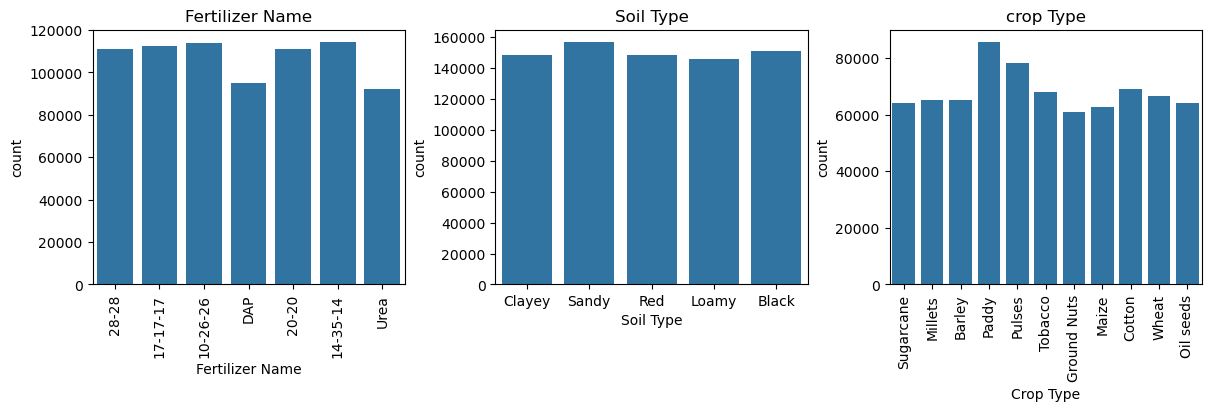

In [7]:
fig = plt.figure(figsize = (12, 4))
plt.subplot(1, 3, 1)
sns.countplot(x = train["Fertilizer Name"])
plt.xticks(rotation = 90)
plt.title("Fertilizer Name")
plt.subplot(1, 3, 2)
sns.countplot(x = train["Soil Type"])
plt.title("Soil Type")
plt.subplot(1, 3, 3)
sns.countplot(x = train["Crop Type"])
plt.xticks(rotation = 90)
plt.title("crop Type")
plt.show()

In [8]:
print(train.columns.to_list())

['id', 'Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name']


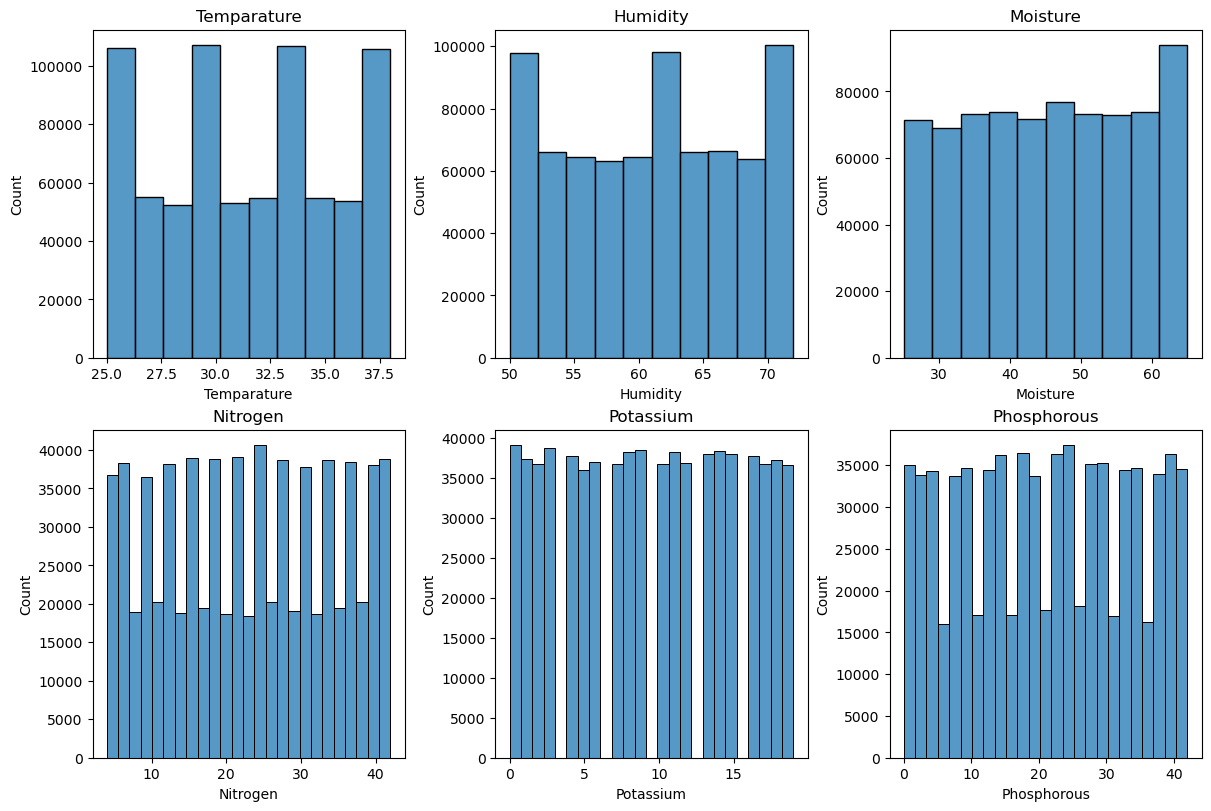

In [9]:
fig = plt.figure(figsize = (12, 8), constrained_layout = True)
ax1 = plt.subplot(2, 3, 1)
sns.histplot(train,x= "Temparature", bins=10, ax = ax1)
ax1.set_title("Temparature")
ax2 = plt.subplot(2,3, 2)
sns.histplot(train,x= "Humidity", bins=10, ax = ax2)
ax2.set_title("Humidity")
ax3 = plt.subplot(2,3, 3)
sns.histplot(train,x= "Moisture", bins=10, ax = ax3)
ax3.set_title("Moisture")
ax4 = plt.subplot(2,3,4)
sns.histplot(train, x = "Nitrogen", bins = 25, ax = ax4)
ax4.set_title("Nitrogen")
ax5  = plt.subplot(2,3,5)
sns.histplot(train, x = "Potassium", bins = 25, ax = ax5)
ax5.set_title("Potassium")
ax6 = plt.subplot(2,3,6)
sns.histplot(train, x = "Phosphorous", bins = 25, ax = ax6)
ax6.set_title("Phosphorous")

plt.show()

In [10]:
long = pd.melt(train, id_vars = ["Fertilizer Name"],
               value_vars = ["Temparature", "Humidity", "Moisture",
                             "Nitrogen", "Potassium", "Phosphorous"])

/Users/sohengkhiong/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

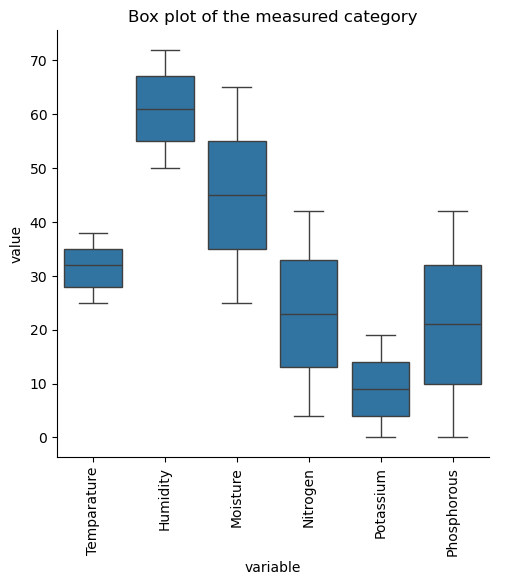

In [11]:
fig = plt.figure(figsize = (12, 8))
sns.catplot(data = long, x = "variable", y = "value", kind = "box")
plt.xticks(rotation = 90)
plt.title("Box plot of the measured category")
plt.show()

From the above plot, the features are evenly distributed, and there is no outlier


# Machine learning

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, MinMaxScaler, LabelEncoder
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score, recall_score
from sklearn.metrics import roc_curve, precision_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import xgboost as xgb

import time

set_config(transform_output="pandas")


In [13]:
RandomStateNumber = 13

In [14]:
train.head()
X = train.drop(["Fertilizer Name"], axis = 1)
y = train["Fertilizer Name"]

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state= RandomStateNumber, stratify= y)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)

In [16]:
import joblib
filename = "fertilizer_classification/le_classes.pkl"
joblib.dump(le, filename)

['fertilizer_classification/le_classes.pkl']

In [17]:
le.classes_

array(['10-26-26', '14-35-14', '17-17-17', '20-20', '28-28', 'DAP',
       'Urea'], dtype=object)

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600000 entries, 619640 to 227020
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           600000 non-null  int64 
 1   Temparature  600000 non-null  int64 
 2   Humidity     600000 non-null  int64 
 3   Moisture     600000 non-null  int64 
 4   Soil Type    600000 non-null  object
 5   Crop Type    600000 non-null  object
 6   Nitrogen     600000 non-null  int64 
 7   Potassium    600000 non-null  int64 
 8   Phosphorous  600000 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 45.8+ MB


## Pipeline

In [19]:
# Feature engineering: add Power (W) feature in the data
def feature_engineer(df):
    df = df.copy()
    df["temp_humidity"] = df["Temparature"] * df["Humidity"]
    df["temp_moisture"] = df["Temparature"] * df["Moisture"]
    df["humidity_moisture"] = df["Humidity"] * df["Moisture"]
    df["NPK"] = df["Nitrogen"] + df["Potassium"] + df["Phosphorous"]
    df["Nitrogen_ratio"] = df["Nitrogen"] / df["NPK"]
    df["Potassium_ratio"] = df["Potassium"] / df["NPK"]
    df["Phosphorous_ratio"] = df["Phosphorous"] / df["NPK"]

    return df

In [20]:
train[["Nitrogen", "Potassium", "Phosphorous"]].apply(sum)

Nitrogen       17320356
Potassium       7108722
Phosphorous    15804920
dtype: int64

In [21]:
feature_engineer(X_train).describe()

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,temp_humidity,temp_moisture,humidity_moisture,NPK,Nitrogen_ratio,Potassium_ratio,Phosphorous_ratio
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,374864.589293,31.504830,61.045752,45.188795,23.099387,9.484050,21.066090,1923.274668,1423.584205,2758.827233,53.649527,0.435078,0.186519,0.378403
std,216549.662174,4.024349,6.645135,11.794920,11.213131,5.765672,12.343262,324.222201,416.233272,784.634657,17.599780,0.181693,0.125163,0.189149
min,0.000000,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000,1250.000000,625.000000,1250.000000,4.000000,0.061538,0.000000,0.000000
25%,187356.750000,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000,1682.000000,1085.000000,2108.000000,41.000000,0.303030,0.092105,0.242424
50%,374811.500000,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000,1900.000000,1404.000000,2736.000000,54.000000,0.431034,0.177419,0.392857
75%,562465.250000,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000,2145.000000,1728.000000,3348.000000,66.000000,0.552632,0.257143,0.509804
max,749998.000000,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000,2736.000000,2470.000000,4680.000000,103.000000,1.000000,0.826087,0.913043


In [22]:
feature_transformer = FunctionTransformer(feature_engineer)

numeric_features = [
    "Temparature", "Humidity", "Moisture",
    "Nitrogen", "Potassium", "Phosphorous",
    # "temp_humidity", "temp_moisture", "humidity_moisture",
    # "Nitrogen_ratio", "Potassium_ratio", "Phosphorous_ratio"
]

categorical_features = [
    "Soil Type", "Crop Type"
]

# Column Transformer for the different transformation
numericColumns = ColumnTransformer(
    transformers = [
        ('num', MinMaxScaler(), numeric_features),
    ],
    remainder = "passthrough",
    verbose_feature_names_out= False
)


transformColumns = ColumnTransformer(
    transformers =[
        ('num', MinMaxScaler(), numeric_features),
         ('cat', OneHotEncoder(sparse_output= False), categorical_features)
         ],
    verbose_feature_names_out= False)

chartprocessing = Pipeline(
    [
        ('feature_engineering', feature_transformer),
        ('numeric_Columns', numericColumns)
        ]
    )

preprocessing = Pipeline(
    [
        # ('feature_engineering', feature_transformer),
        ('transformColumns', transformColumns)
        ]
    )

# # Create pipeline
pipe = Pipeline([
    ('classifier', RandomForestClassifier(random_state= RandomStateNumber)) # Placeholder model
    ,
])

In [23]:
# preprocess train & test data
X_train_scaled = preprocessing.fit_transform(X_train)
X_val_scaled = preprocessing.transform(X_val)

In [24]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600000 entries, 619640 to 227020
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Temparature            600000 non-null  float64
 1   Humidity               600000 non-null  float64
 2   Moisture               600000 non-null  float64
 3   Nitrogen               600000 non-null  float64
 4   Potassium              600000 non-null  float64
 5   Phosphorous            600000 non-null  float64
 6   Soil Type_Black        600000 non-null  float64
 7   Soil Type_Clayey       600000 non-null  float64
 8   Soil Type_Loamy        600000 non-null  float64
 9   Soil Type_Red          600000 non-null  float64
 10  Soil Type_Sandy        600000 non-null  float64
 11  Crop Type_Barley       600000 non-null  float64
 12  Crop Type_Cotton       600000 non-null  float64
 13  Crop Type_Ground Nuts  600000 non-null  float64
 14  Crop Type_Maize        600000 non-nu

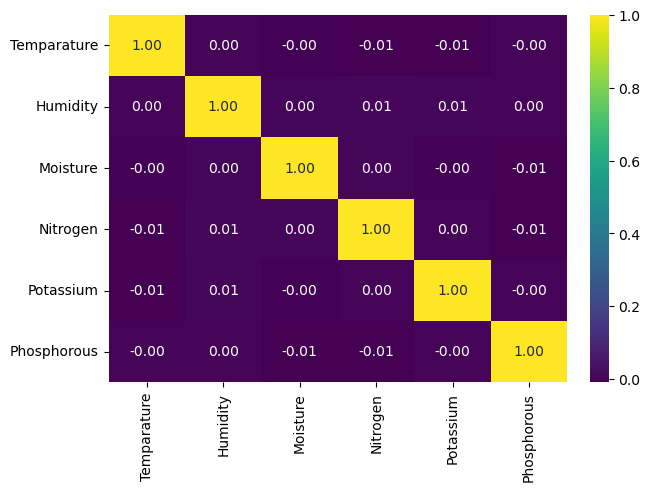

In [25]:
sns.heatmap(X_train_scaled[numeric_features].corr(numeric_only = True), annot = True, fmt= ".2f", cmap = "viridis")
plt.xticks(rotation = 90);

## Model

In [26]:
# Stratified KFold for cross valuation score

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state= RandomStateNumber)
summaries = []
scoring_metrics = "accuracy"

# XGBoost

In [27]:
xgb_classisfier = xgb.XGBClassifier(random_state= RandomStateNumber)
xgb_classisfier.fit(X_train_scaled, y_train)

y_pred = xgb_classisfier.predict(X_val_scaled)
y_pred

test_accuracy = accuracy_score(y_val, y_pred)
print("Test accuracy", test_accuracy)
print("\nClassification Report\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))



Test accuracy 0.19408

Classification Report
               precision    recall  f1-score   support

           0       0.20      0.23      0.21     22777
           1       0.19      0.26      0.22     22887
           2       0.20      0.24      0.22     22491
           3       0.19      0.19      0.19     22178
           4       0.19      0.21      0.20     22232
           5       0.20      0.13      0.16     18972
           6       0.19      0.08      0.11     18463

    accuracy                           0.19    150000
   macro avg       0.19      0.19      0.19    150000
weighted avg       0.19      0.19      0.19    150000


Confusion Matrix:
 [[5212 4495 3699 3238 3503 1622 1008]
 [3910 5910 3846 3066 3453 1713  989]
 [3692 4376 5290 3072 3440 1606 1015]
 [3818 4287 3758 4131 3426 1747 1011]
 [3694 4175 3688 3249 4701 1654 1071]
 [3156 3563 2908 2845 3115 2460  925]
 [3035 3538 3129 2626 3127 1600 1408]]


In [28]:
param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 6, 9],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.7, 1.0],
    "colsample_bytree": [0.7, 0.85, 1.0],
    "reg_alpha": [0, 0.01, 0.1, 1, 10],
    "reg_lambda": [0.5, 0.7, 1, 1.3]
}

xgb_model = xgb.XGBClassifier(random_state= RandomStateNumber)

grid_search = RandomizedSearchCV(
    xgb_model, param_grid, cv = stratified_cv, scoring = "accuracy", n_iter=20, n_jobs=-1, verbose =  2
)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=100, reg_alpha=10, reg_lambda=0.7, subsample=1.0; total time= 2.2min
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=100, reg_alpha=10, reg_lambda=0.7, subsample=1.0; total time= 2.2min
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=100, reg_alpha=10, reg_lambda=0.7, subsample=1.0; total time= 2.2min
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=100, reg_alpha=10, reg_lambda=0.7, subsample=1.0; total time= 2.2min
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=100, reg_alpha=10, reg_lambda=0.7, subsample=1.0; total time= 2.2min
[CV] END colsample_bytree=0.85, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, reg_alpha=

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=13, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.85, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 6, 9],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200],
                                        'reg_alpha': [0, 0.01, 0.1, 1, 10],
                                        'reg_lambda': [0.5, 0.7, 1, 1.3],
                                        'subsample': [0.7, 1.0]},
                   scoring='accuracy', verbose=2)

In [29]:
best_xgb = grid_search.best_estimator_
best_param = grid_search.best_params_
print("best Parameter:", best_param)
print("best score", grid_search.best_score_)

best Parameter: {'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 10, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.2, 'colsample_bytree': 0.85}
best score 0.19718333333333332


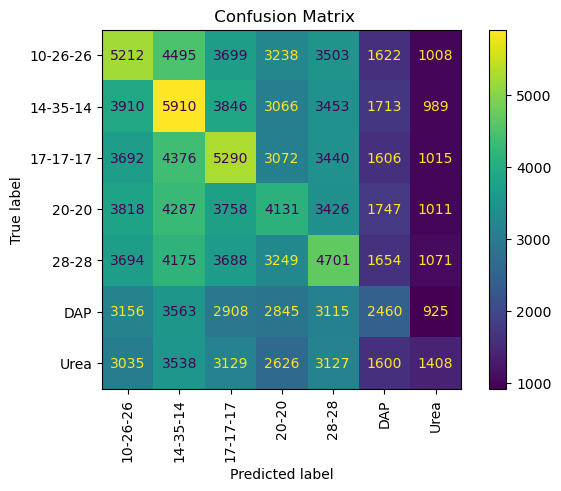

In [30]:
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=le.classes_)
disp.plot()
plt.title(f" Confusion Matrix")
plt.xticks(rotation = 90)
plt.show()

In [31]:
print(classification_report(y_val, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

    10-26-26       0.20      0.23      0.21     22777
    14-35-14       0.19      0.26      0.22     22887
    17-17-17       0.20      0.24      0.22     22491
       20-20       0.19      0.19      0.19     22178
       28-28       0.19      0.21      0.20     22232
         DAP       0.20      0.13      0.16     18972
        Urea       0.19      0.08      0.11     18463

    accuracy                           0.19    150000
   macro avg       0.19      0.19      0.19    150000
weighted avg       0.19      0.19      0.19    150000



In [32]:
import joblib
filename = "fertilizer_classification/best_model.pkl"
joblib.dump(best_xgb, filename)

['fertilizer_classification/best_model.pkl']

In [ ]:
y_pred_proba = best_xgb.predict_proba(X_val_scaled)
top3_indices_test = np.argsort(y_pred_proba, axis=1)[:, -3:][:, ::-1]
predictTable = pd.DataFrame()
predictTable["y_pred_proba"] = list(top3_indices_test)
predictTable["y_val"] = y_val
predictTable.head()

,y_pred_proba,y_val
0,"[5, 6, 0]",0
1,"[4, 3, 1]",2
2,"[5, 3, 1]",4
3,"[1, 2, 3]",5
4,"[4, 5, 1]",6
...,...,...
149995,"[1, 3, 4]",0
149996,"[5, 1, 6]",1
149997,"[0, 3, 1]",5
149998,"[1, 6, 0]",2


In [ ]:
predictTable["y_pred"] = predictTable.apply(
    lambda row: (
        row["y_val"] if row["y_val"] in row["y_pred_proba"]
        else row["y_pred_proba"][0]  # returns the first item if False
    ),
    axis=1
)
predictTable["y_pred"].astype(int)


              precision    recall  f1-score   support

    10-26-26       0.51      0.61      0.56     22777
    14-35-14       0.49      0.62      0.55     22887
    17-17-17       0.51      0.59      0.55     22491
       20-20       0.52      0.54      0.53     22178
       28-28       0.50      0.56      0.53     22232
         DAP       0.51      0.33      0.40     18972
        Urea       0.58      0.26      0.35     18463

    accuracy                           0.51    150000
   macro avg       0.52      0.50      0.50    150000
weighted avg       0.52      0.51      0.50    150000



In [ ]:
print(classification_report(predictTable["y_val"],predictTable["y_pred"], target_names=le.classes_))


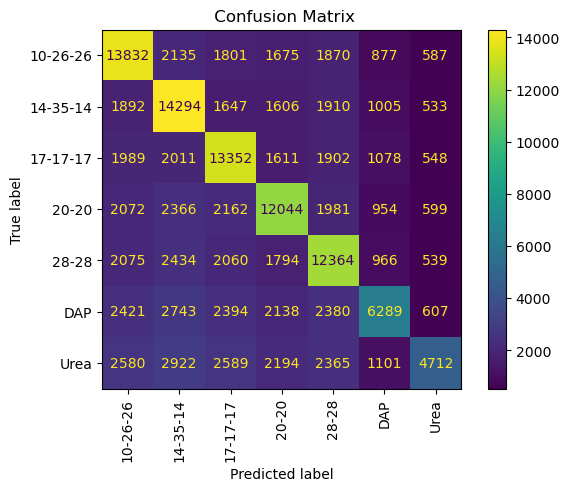

In [ ]:
cm = confusion_matrix(predictTable["y_val"],predictTable["y_pred"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=le.classes_)
disp.plot()
plt.title(f" Confusion Matrix")
plt.xticks(rotation = 90)
plt.show()

### Random Forest Classifier

In [ ]:
ranForest = RandomForestClassifier(random_state= RandomStateNumber)
ranForest.fit(X_train_scaled, y_train)

In [ ]:
ranForest.score(X_val_scaled, y_val)

In [ ]:
y_pred = ranForest.predict(X_val_scaled)
y_pred

In [ ]:
y_pred_proba = ranForest.predict_proba(X_val_scaled)
y_pred_proba

In [ ]:
top3_indices_test = np.argsort(y_pred_proba, axis=1)[:, -3:][:, ::-1]
top3_indices_test

In [ ]:
# np.argsort(y_pred_proba, axis=1)[:, -1:][:, ::-1]
np.argmax(y_pred_proba, axis=1)

In [ ]:
print(ranForest.classes_)
print(le.classes_)

In [ ]:
# ranForest.classes_[top3_indices_test]
le.classes_[top3_indices_test]

In [ ]:
le.classes_[y_pred]

In [ ]:
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=le.classes_)
disp.plot()
plt.title(f" Confusion Matrix")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
print(classification_report(y_val, y_pred, target_names=le.classes_))

In [ ]:
ranForest.feature_importances_

In [ ]:
important = ranForest.feature_importances_
print("Feature Importances:", important)

In [ ]:
columns = X_train_scaled.columns
coeff = pd.Series(important, columns)
print(coeff.sort_values(ascending = False))

fig = plt.figure(figsize=(5,3), layout = "constrained")

coeff.sort_values(ascending = True).plot.barh(color="blue")
plt.title("Feature Importance", fontsize=10)
plt.show()

In [ ]:
# Random Forest Classifier
time_start = time.time()
param_grid_for = [
    {
        'classifier': [RandomForestClassifier(random_state= RandomStateNumber)],
        'classifier__n_estimators': [100, 200, 400],
        'classifier__max_depth': [5, 8, 10, 12, 15, 20, 50, 100, None]
    }]

grid_for = GridSearchCV(pipe, param_grid = param_grid_for,
                             cv=stratified_cv, scoring= scoring_metrics,
                             n_jobs = -1)

grid_for.fit(X_train_scaled, y_train)
time_lapse = time.time() - time_start
time_lapse

In [ ]:
# Access the classifier step within the pipeline
best_model = grid_for.best_estimator_
classifier_model = best_model.named_steps['classifier']

# Check if the classifier has the feature_importances_ attribute
if hasattr(classifier_model, 'feature_importances_'):
    # Access and print the feature importances
    important = classifier_model.feature_importances_
    print("Feature Importances:", important)

else:
    print("The best model does not have the attribute 'feature_importances_'.")
columns = X_train_scaled.columns
coeff = pd.Series(important, columns)
print(coeff.sort_values(ascending = False))

fig = plt.figure(figsize=(5,3), layout = "constrained")

coeff.sort_values(ascending = True).plot.barh(color="blue")
plt.title("Feature Importance", fontsize=10)
plt.show()
